## Data Analysis for images

In [37]:
import pandas as pd
import shap
from sklearn import metrics
import numpy as np

In [19]:
df=pd.read_csv('train.csv')

In [20]:
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [22]:
df['Pawpularity'].max()

100

In [23]:
df['Pawpularity'].min()

1

<AxesSubplot:xlabel='Pawpularity', ylabel='Count'>

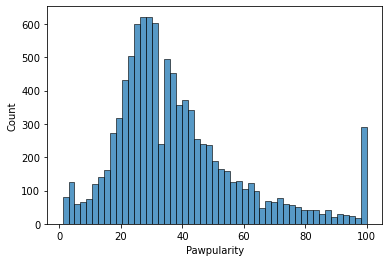

In [24]:
sns.histplot(x='Pawpularity', data=df)

## Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
features=['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

In [26]:
Y=df['Pawpularity']
X=df[features]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=17)

In [31]:
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [32]:
Y_pred=model.predict(X_test)

In [38]:
#some metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 15.197993824938406
Mean Squared Error: 410.00578927402495
Root Mean Squared Error: 20.248599686744388


**SHAP**

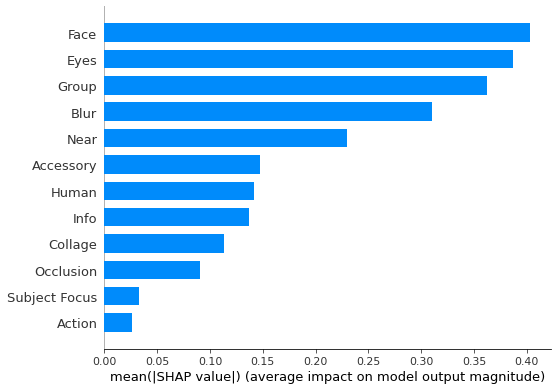

In [74]:
explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

The expected value is  [38.24305713]


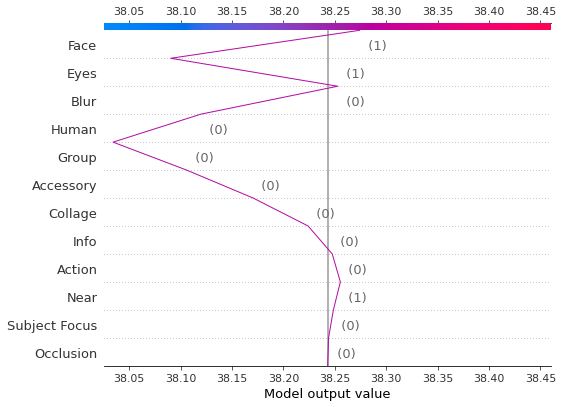

In [62]:
expected_value = explainer.expected_value
print("The expected value is ", expected_value)
shap_values = explainer.shap_values(X_test)[8]
shap.decision_plot(expected_value, shap_values, X_test)

In [66]:
import matplotlib.pyplot as plt

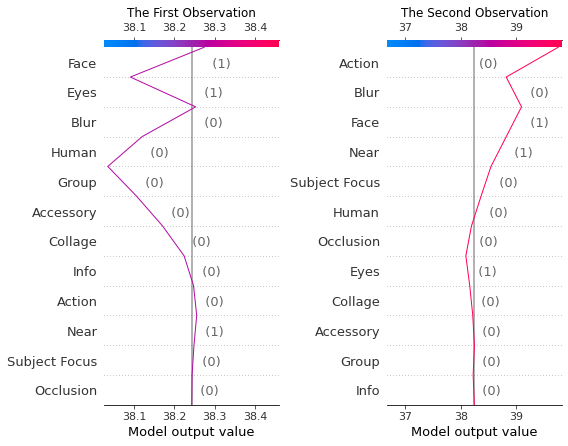

In [72]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
shap_values = explainer.shap_values(X_test)[0]
shap.decision_plot(expected_value, shap_values, X_test, show=False)
ax1.title.set_text('The First Observation')

ax2 = fig.add_subplot(122)
shap_values = explainer.shap_values(X_test)[2]
shap.decision_plot(expected_value, shap_values, X_test, show=False)
ax2.title.set_text('The Third Observation')
plt.tight_layout()
plt.show()

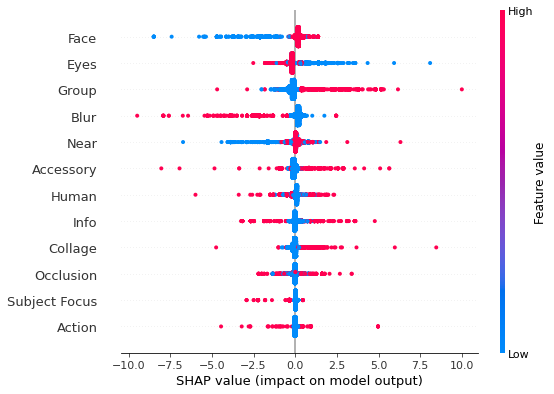

In [75]:
shap.summary_plot(shap_values, X_train)

The horizontal location shows whether the effect of that value is associated with a higher or lower prediction. Red color is more impact from the feature to the result. The thicker the line on the graph, than more such observation points
 

## XGBOOST

In [51]:
import xgboost as xgb

In [52]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [53]:
xg_reg.fit(X_train,Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
Y_pred = xg_reg.predict(X_test)

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 16.37507117497939
Mean Squared Error: 567.5527015222345
Root Mean Squared Error: 23.823364613803705


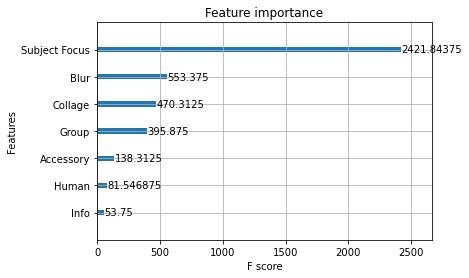

In [56]:
xgb.plot_importance(xg_reg, importance_type='gain');